In [1]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, read_csv, get_dummies
from scipy.stats import zscore
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.pyplot import figure, subplot2grid
from matplotlib import pyplot as plt
from seaborn import set_theme,scatterplot,displot,barplot,countplot,heatmap
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from numpy import where,abs,median,nan,sqrt
%matplotlib inline

In [2]:
df=pd.read_csv('Engineering_graduate_salary.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [4]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

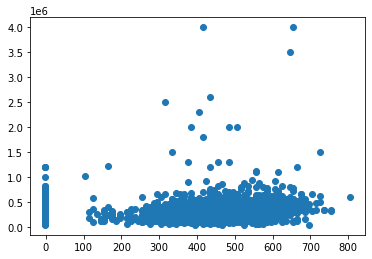

In [6]:
plt.scatter(df['ComputerProgramming'],df['Salary'])
plt.show()

In [7]:
l1=['ID', 'DOB','Gender', 'CollegeID', 'CollegeTier', 'CollegeState','GraduationYear','English','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg', 'TelecomEngg','CivilEngg']

In [8]:
df.drop(columns=l1, inplace=True)

In [9]:
df.columns

Index(['10percentage', '10board', '12graduation', '12percentage', '12board',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'Logical', 'Quant', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

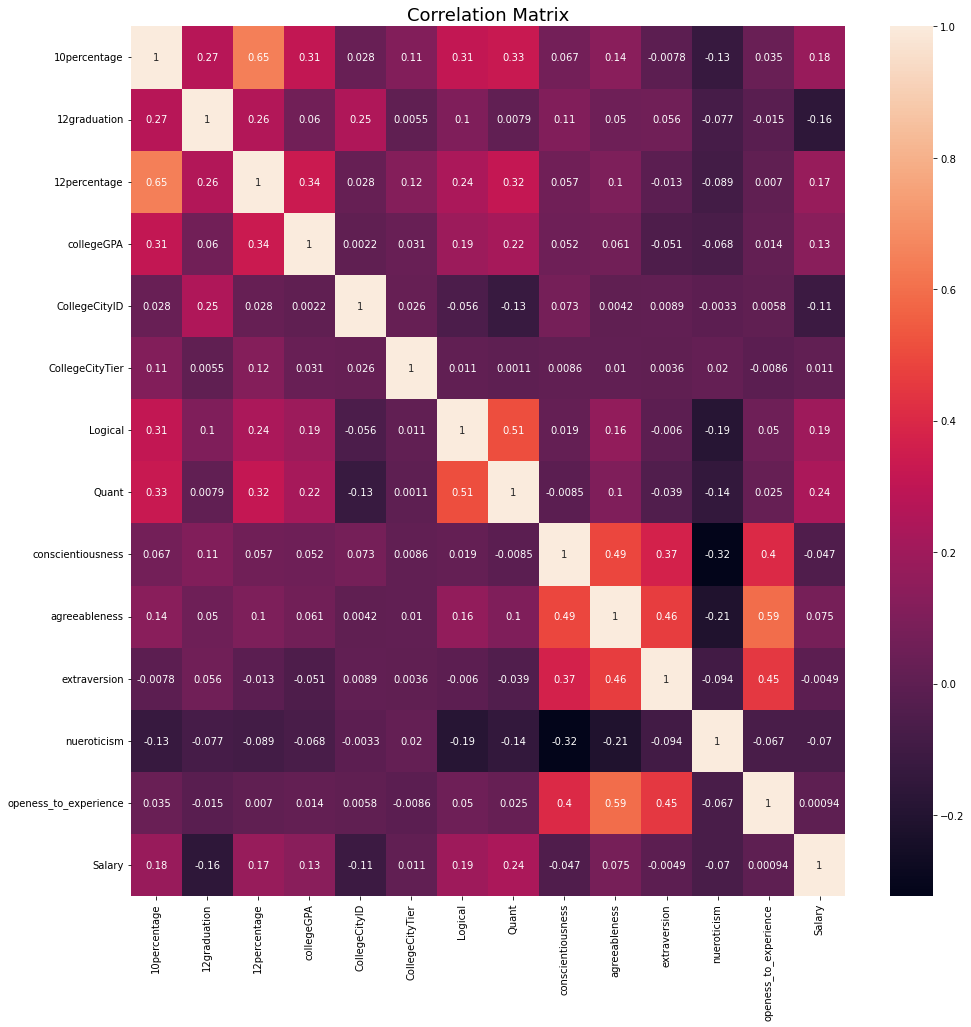

In [10]:
figure(figsize=(16,16))
plot = heatmap(df.corr(), annot=True)
plot.set_title("Correlation Matrix", fontsize=18)

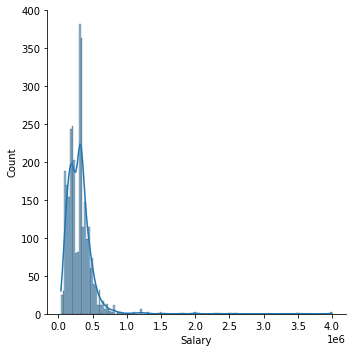

In [11]:
plot = displot(df["Salary"], kde=True)

In [12]:
df["Salary"] = df["Salary"].replace([df["Salary"][(abs(zscore(df["Salary"])) > 3)]], median(df["Salary"]))

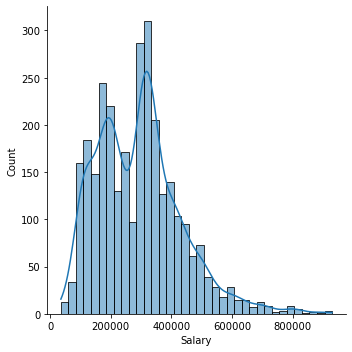

In [13]:
plot = displot(data=df["Salary"], kde=True)

Text(0.5, 1.0, 'Scatter Plot of 10percentage with 12percentage')

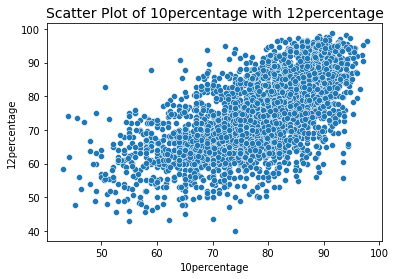

In [14]:
plot = scatterplot(x=df['10percentage'], y=df['12percentage'])
plot.set_title("Scatter Plot of 10percentage with 12percentage", fontsize=14)

In [15]:
df["10percentage"].corr(df["12percentage"])

0.6455783772755835

Text(0.5, 1.0, 'Scatter Plot of collegeGPA with Salary')

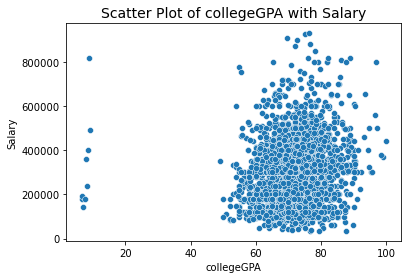

In [16]:
plot = scatterplot(x=df["collegeGPA"],y=df["Salary"])
plot.set_title("Scatter Plot of collegeGPA with Salary", fontsize=14)

Text(0.5, 1.0, 'Quant')

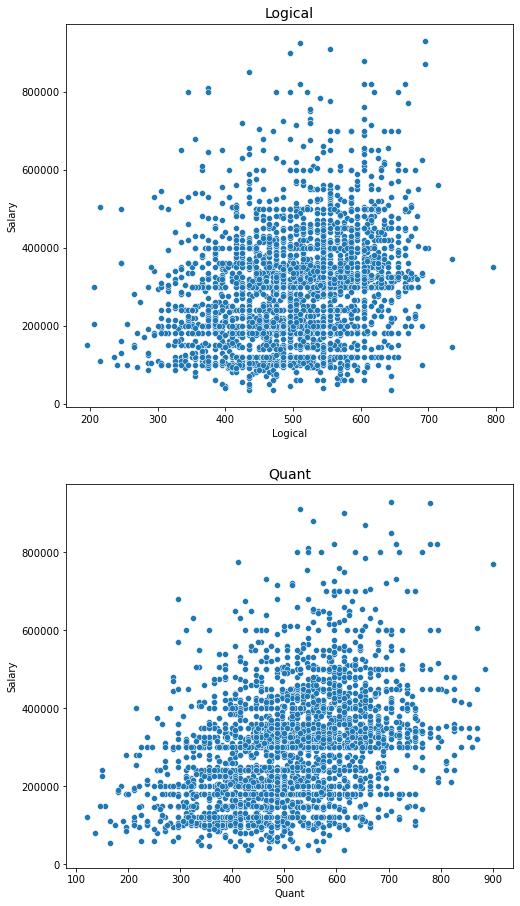

In [17]:
figure(figsize=(8,24))
subplot2grid((3,1),(1,0))
scatterplot(x=df['Logical'], y=df['Salary']).set_title("Logical", fontsize=14)
subplot2grid((3,1),(2,0))
scatterplot(x=df['Quant'], y=df['Salary']).set_title("Quant", fontsize=14)

Text(0.5, 1.0, 'Scatter Plot of 10board with 12board')

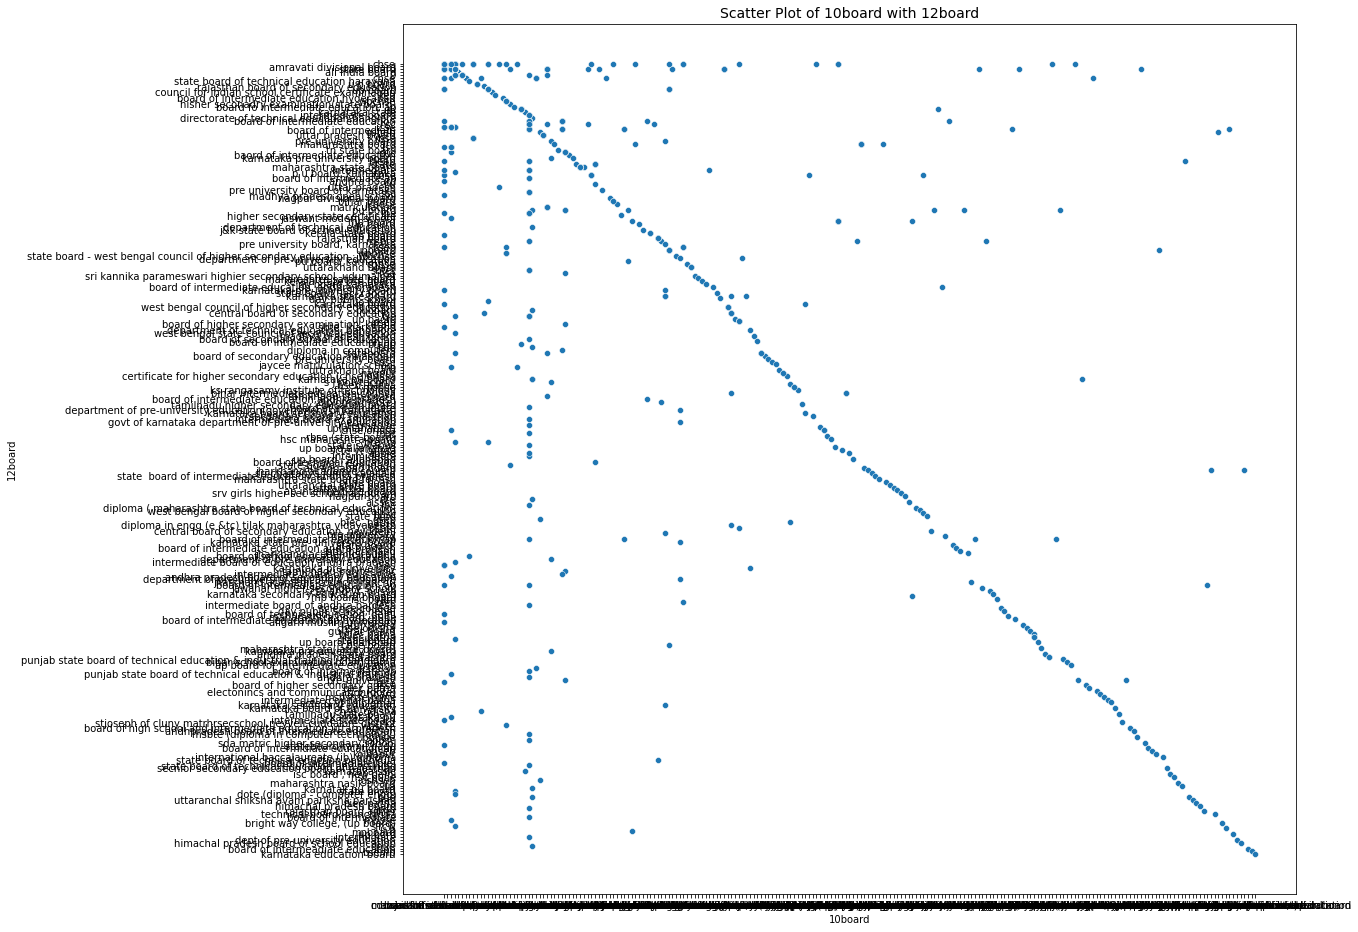

In [18]:
figure(figsize=(16,16))
plot= scatterplot(x=df["10board"],y=df["12board"])
plot.set_title("Scatter Plot of 10board with 12board", fontsize=14)

In [19]:
df.drop(columns=["10board"], inplace=True)

Text(0.5, 1.0, 'Count Plot of 12board')

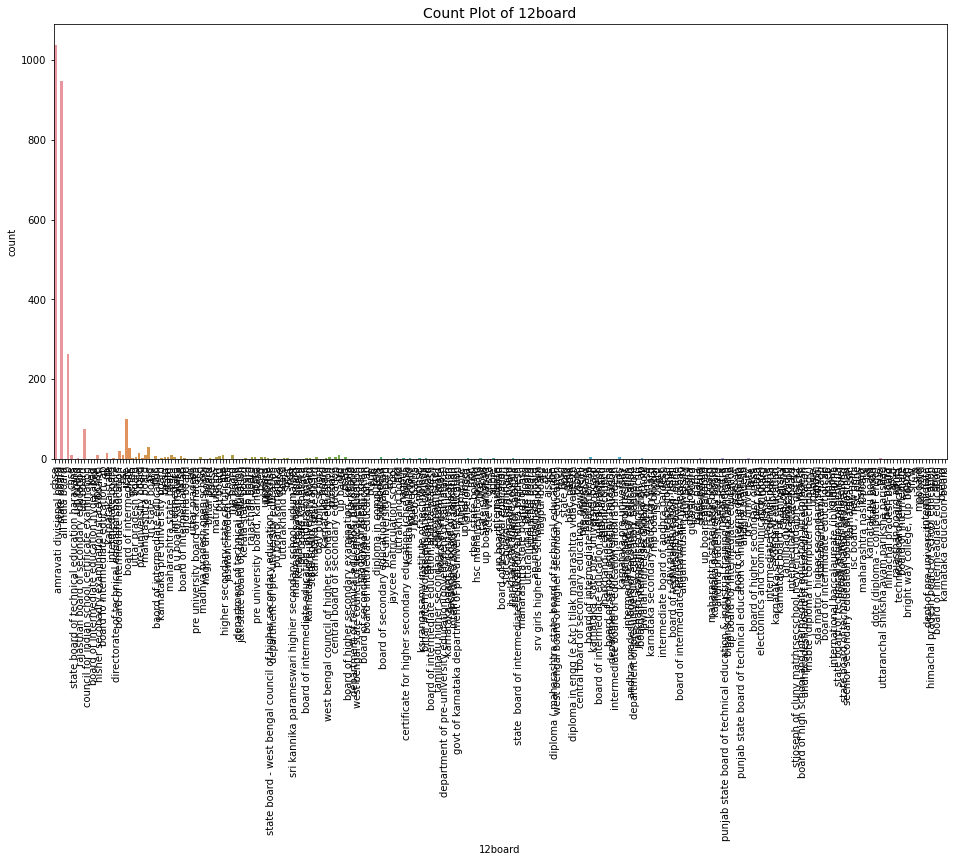

In [20]:
figure(figsize=(16,8))
plot = countplot(x=df["12board"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Count Plot of 12board", fontsize=14)

In [21]:
board = df["12board"].value_counts()

In [22]:
rare_board = board[board <= 10]

In [23]:
def remove_rare_board(value):
    if value in rare_board:
        return 'other'
    else:
        return value
df["12board"] = df["12board"].apply(remove_rare_board)
df["12board"].value_counts()

cbse                               1039
state board                         948
other                               443
0                                   264
icse                                101
up board                             74
isc                                  29
board of intermediate                27
board of intermediate education      21
rbse                                 16
up                                   14
chse                                 11
mp board                             11
Name: 12board, dtype: int64

In [24]:
df["12board"].replace(to_replace='0',value='cbse', inplace=True)

In [25]:
df.head()

,10percentage,12graduation,12percentage,12board,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,87.80,2009,84.00,cbse,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,665,810,-0.1590,0.3789,1.2396,0.14590,0.2889,445000.0
1,57.00,2010,64.50,cbse,B.Tech/B.E.,computer science & engineering,65.00,6624,0,435,210,1.1336,0.0459,1.2396,0.52620,-0.2859,110000.0
2,77.33,2007,85.17,other,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,475,505,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000.0
3,84.30,2009,86.00,cbse,B.Tech/B.E.,computer science & engineering,80.40,8195,1,620,635,-0.4463,0.2124,0.3174,0.27270,0.4805,420000.0
4,82.00,2008,75.00,cbse,B.Tech/B.E.,biotechnology,64.30,4889,1,495,365,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000.0


In [26]:
df = get_dummies(df, columns=["12board"], prefix="board_")

Text(0.5, 1.0, 'Bar Plot of Degree with Salary')

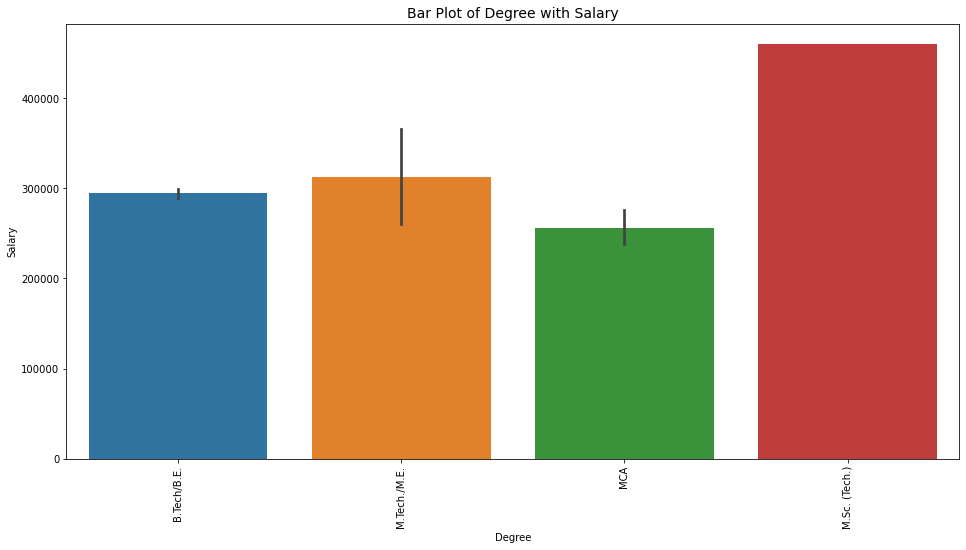

In [27]:
figure(figsize=(16,8))
plot = barplot(x=df["Degree"],y=df["Salary"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of Degree with Salary", fontsize=14)

In [28]:
df["Degree"].value_counts()

B.Tech/B.E.      2757
MCA               200
M.Tech./M.E.       40
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [29]:
df = get_dummies(df, columns=["Degree"], prefix="degree_")

Text(0.5, 1.0, 'Count Plot of Specialization')

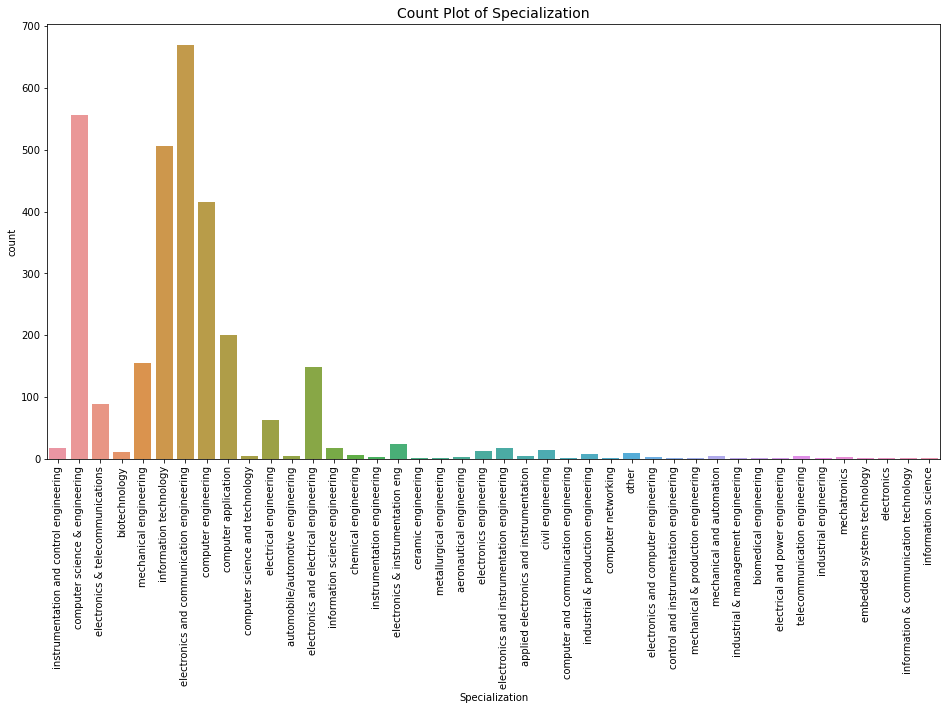

In [30]:
figure(figsize=(16,8))
plot = countplot(x=df["Specialization"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Count Plot of Specialization", fontsize=14)

In [31]:
specializations = df["Specialization"].value_counts()
rare_specialization = specializations[specializations <= 10]

In [32]:
def remove_rare_specializations(value):
    if value in rare_specialization:
        return 'other'
    else:
        return value
df["Specialization"] = df["Specialization"].apply(remove_rare_specializations)
df["Specialization"].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

In [33]:
df = get_dummies(df, columns=["Specialization"], prefix="specialization_")

Text(0.5, 1.0, 'openess_to_experience')

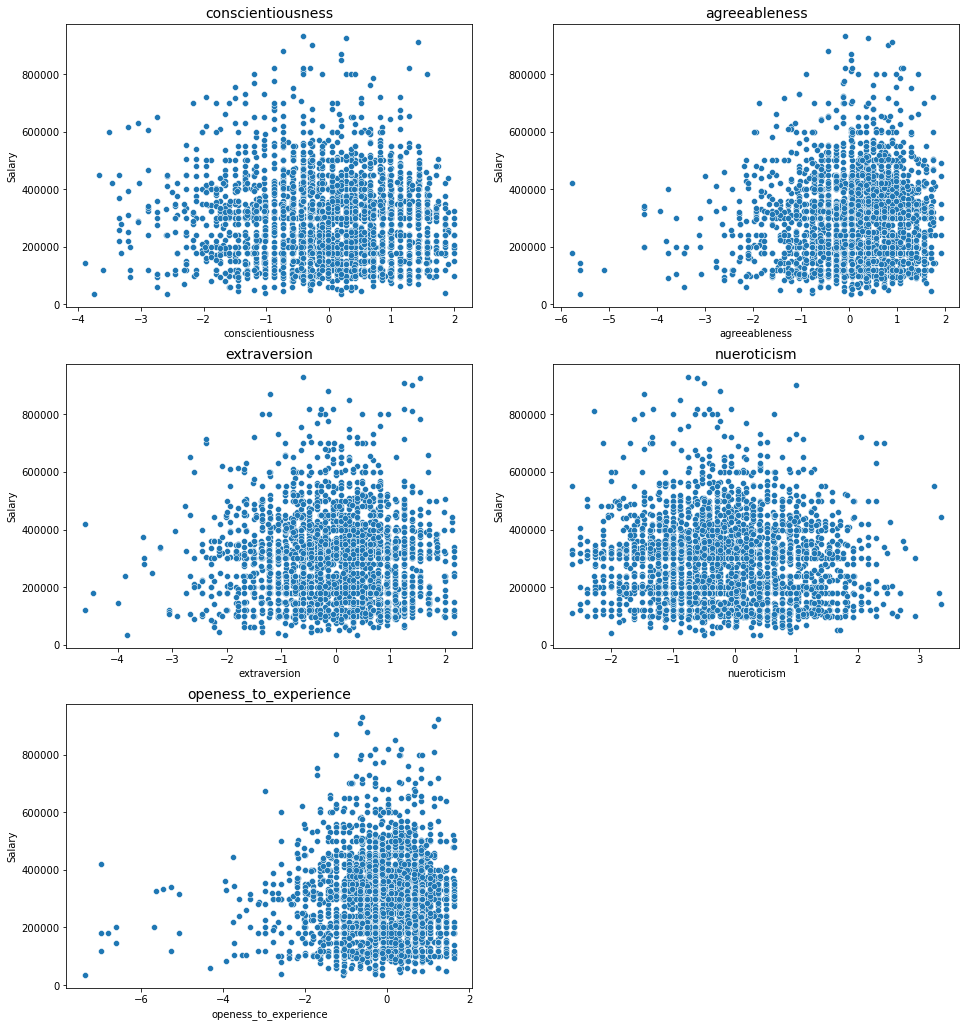

In [34]:
figure(figsize=(16,24))
subplot2grid((4,2),(0,0))
scatterplot(x=df['conscientiousness'], y=df['Salary']).set_title("conscientiousness", fontsize=14)
subplot2grid((4,2),(0,1))
scatterplot(x=df['agreeableness'], y=df['Salary']).set_title("agreeableness", fontsize=14)
subplot2grid((4,2),(1,0))
scatterplot(x=df['extraversion'], y=df['Salary']).set_title("extraversion", fontsize=14)
subplot2grid((4,2),(1,1))
scatterplot(x=df['nueroticism'], y=df['Salary']).set_title("nueroticism", fontsize=14)
subplot2grid((4,2),(2,0))
scatterplot(x=df['openess_to_experience'], y=df['Salary']).set_title("openess_to_experience", fontsize=14)

In [35]:
columns_all=list(df.columns)
columns_all.remove('Salary')

In [36]:
columns_all

['10percentage',
 '12graduation',
 '12percentage',
 'collegeGPA',
 'CollegeCityID',
 'CollegeCityTier',
 'Logical',
 'Quant',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'board__board of intermediate',
 'board__board of intermediate education',
 'board__cbse',
 'board__chse',
 'board__icse',
 'board__isc',
 'board__mp board',
 'board__other',
 'board__rbse',
 'board__state board',
 'board__up',
 'board__up board',
 'degree__B.Tech/B.E.',
 'degree__M.Sc. (Tech.)',
 'degree__M.Tech./M.E.',
 'degree__MCA',
 'specialization__biotechnology',
 'specialization__civil engineering',
 'specialization__computer application',
 'specialization__computer engineering',
 'specialization__computer science & engineering',
 'specialization__electrical engineering',
 'specialization__electronics & instrumentation eng',
 'specialization__electronics & telecommunications',
 'specialization__electronics and communication engineering',
 'specialization__

In [37]:
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,10percentage,12graduation,12percentage,collegeGPA,CollegeCityID,CollegeCityTier,Logical,Quant,conscientiousness,agreeableness,...,specialization__electronics & telecommunications,specialization__electronics and communication engineering,specialization__electronics and electrical engineering,specialization__electronics and instrumentation engineering,specialization__electronics engineering,specialization__information science engineering,specialization__information technology,specialization__instrumentation and control engineering,specialization__mechanical engineering,specialization__other
0,0.898118,0.998509,0.851064,0.738717,0.375903,1.0,0.836478,0.900000,-0.040839,0.065535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.583061,0.999006,0.653495,0.650455,0.359824,0.0,0.547170,0.233333,0.291167,0.007939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.791019,0.997515,0.862918,0.619834,0.493454,0.0,0.597484,0.561111,0.130994,-0.021309,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.862316,0.998509,0.871327,0.804563,0.445163,1.0,0.779874,0.705556,-0.114633,0.036737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.838789,0.998012,0.759878,0.643450,0.265577,1.0,0.622642,0.405556,-0.385072,-0.129255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0.767185,0.996521,0.739615,0.700490,0.068608,1.0,0.610063,0.494444,-0.305679,0.167566,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2994,0.859247,0.998012,0.780142,0.752527,0.515020,0.0,0.735849,0.438889,-0.027791,0.005673,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2995,0.934943,0.997018,0.664235,0.732413,0.029714,0.0,0.534591,0.538889,-0.226286,0.032655,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2996,0.906710,0.997018,0.660182,0.748624,0.088489,1.0,0.811321,0.561111,0.369198,0.221530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_max_scaled[columns_all]

,10percentage,12graduation,12percentage,collegeGPA,CollegeCityID,CollegeCityTier,Logical,Quant,conscientiousness,agreeableness,...,specialization__electronics & telecommunications,specialization__electronics and communication engineering,specialization__electronics and electrical engineering,specialization__electronics and instrumentation engineering,specialization__electronics engineering,specialization__information science engineering,specialization__information technology,specialization__instrumentation and control engineering,specialization__mechanical engineering,specialization__other
0,0.898118,0.998509,0.851064,0.738717,0.375903,1.0,0.836478,0.900000,-0.040839,0.065535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.583061,0.999006,0.653495,0.650455,0.359824,0.0,0.547170,0.233333,0.291167,0.007939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.791019,0.997515,0.862918,0.619834,0.493454,0.0,0.597484,0.561111,0.130994,-0.021309,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.862316,0.998509,0.871327,0.804563,0.445163,1.0,0.779874,0.705556,-0.114633,0.036737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.838789,0.998012,0.759878,0.643450,0.265577,1.0,0.622642,0.405556,-0.385072,-0.129255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0.767185,0.996521,0.739615,0.700490,0.068608,1.0,0.610063,0.494444,-0.305679,0.167566,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2994,0.859247,0.998012,0.780142,0.752527,0.515020,0.0,0.735849,0.438889,-0.027791,0.005673,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2995,0.934943,0.997018,0.664235,0.732413,0.029714,0.0,0.534591,0.538889,-0.226286,0.032655,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2996,0.906710,0.997018,0.660182,0.748624,0.088489,1.0,0.811321,0.561111,0.369198,0.221530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_max_scaled.skew()

10percentage                                                   -0.574702
12graduation                                                   -0.834961
12percentage                                                   -0.026012
collegeGPA                                                     -1.257124
CollegeCityID                                                   0.617395
CollegeCityTier                                                 0.893184
Logical                                                        -0.217769
Quant                                                          -0.043345
conscientiousness                                              -0.515776
agreeableness                                                  -1.261197
extraversion                                                   -0.521642
nueroticism                                                     0.169003
openess_to_experience                                          -1.545677
Salary                                             

In [40]:
len(df_max_scaled.columns)

47

In [41]:
newcols=[
    'board__board of intermediate',
    'board__board of intermediate education',
    'board__chse',
    'board__icse', 'board__isc', 'board__mp board', 'board__other',
    'board__rbse','board__up', 'board__up board',
       'degree__B.Tech/B.E.' 
]
col=list(df_max_scaled.columns)
columns_all+=newcols
col.remove('Salary')

In [42]:
from sklearn.model_selection import train_test_split
data = df_max_scaled.copy()
x = df_max_scaled[columns_all]
y = df_max_scaled[["Salary"]]
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.15, random_state=30)

In [43]:
x

,10percentage,12graduation,12percentage,collegeGPA,CollegeCityID,CollegeCityTier,Logical,Quant,conscientiousness,agreeableness,...,board__board of intermediate education,board__chse,board__icse,board__isc,board__mp board,board__other,board__rbse,board__up,board__up board,degree__B.Tech/B.E.
0,0.898118,0.998509,0.851064,0.738717,0.375903,1.0,0.836478,0.900000,-0.040839,0.065535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.583061,0.999006,0.653495,0.650455,0.359824,0.0,0.547170,0.233333,0.291167,0.007939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.791019,0.997515,0.862918,0.619834,0.493454,0.0,0.597484,0.561111,0.130994,-0.021309,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.862316,0.998509,0.871327,0.804563,0.445163,1.0,0.779874,0.705556,-0.114633,0.036737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.838789,0.998012,0.759878,0.643450,0.265577,1.0,0.622642,0.405556,-0.385072,-0.129255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0.767185,0.996521,0.739615,0.700490,0.068608,1.0,0.610063,0.494444,-0.305679,0.167566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2994,0.859247,0.998012,0.780142,0.752527,0.515020,0.0,0.735849,0.438889,-0.027791,0.005673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2995,0.934943,0.997018,0.664235,0.732413,0.029714,0.0,0.534591,0.538889,-0.226286,0.032655,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2996,0.906710,0.997018,0.660182,0.748624,0.088489,1.0,0.811321,0.561111,0.369198,0.221530,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [44]:
y

,Salary
0,0.478495
1,0.118280
2,0.274194
3,0.451613
4,0.215054
...,...
2993,0.129032
2994,0.129032
2995,0.413978
2996,0.569892


In [45]:
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
#Prediction
y_pred = regressor.predict(X_test)

In [65]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
print("r2 score using linear regression")
r2_score(y_test, y_pred)

r2 score using linear regression


0.2431864015668369

In [66]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,  y_pred))
print("calculation of rmse using linear regresssion")
rmse

calculation of rmse using linear regresssion


0.13392134348770604

In [155]:
from sklearn.linear_model import LassoCV
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)
# Fit model
model.fit(X_train, y_train)
model.alpha_
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)
Lasso(alpha=0.00026525575145821065)

C:\Users\navin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Lasso(alpha=0.00026525575145821065)

In [161]:
print("r2 using lasso regression")
model_lasso = Lasso(alpha=0.00026525575145821065)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test) 
print(r2_score(y_test, pred_test_lasso))

r2 using lasso regression
0.2545926573490649
0.22784863828694957


In [157]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 25.46
R squared test set 22.78


In [64]:
print("calculation of mse and rmse using lasso regression")
import math
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
print(mse)
RMSE = math.sqrt(mse)
print(RMSE)

calculation of mse and rmse using lasso regression
0.02381377692310478
0.15431713100982916


In [167]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
url = 'Engineering_graduate_salary.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.382 (0.519)


In [165]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
url = 'Engineering_graduate_salary.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.51}


In [166]:
print("r2 using ridge regression")
rr = Ridge(alpha=0.519)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(r2_score(y_train, pred_train_rr))
pred_test_rr= rr.predict(X_test)
print(r2_score(y_test, pred_test_rr))

r2 using ridge regression
0.26197965031968107
0.2287996838288504


In [67]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print("calculation of mse and rmse using ridge regression")
print(mse)
RMSE = math.sqrt(mse)
print(RMSE)

calculation of mse and rmse using ridge regression
0.01827165136566962
0.13517267240707206


In [168]:
print("R2 using linear regression is 0.2431864015668369")
print("R2 using lasso regression is 0.22784863828694957")
print("R2 using ridge regression is 0.2287996838288504")
print("Root mean square error using linear regression is 0.13392134348770604")
print("Root mean square error using lasso regression is 0.15431713100982916")
print("Root mean square error using ridge regression is 0.13517267240707206")

R2 using linear regression is 0.2431864015668369
R2 using lasso regression is 0.22784863828694957
R2 using ridge regression is 0.2287996838288504
Root mean square error using linear regression is 0.13392134348770604
Root mean square error using lasso regression is 0.15431713100982916
Root mean square error using ridge regression is 0.13517267240707206


In [171]:
print("the linear regression is providing better result")
print("with r2 score of 24.31 and with minimum root mean square error of 0.1339") 
print("The lasso and ridge Regression model is providing the nearly same value but less than linear.")
print("so we will refer linear regression method to predict the salary of the employees.")


the linear regression is providing better result
with r2 score of 24.31 and with minimum root mean square error of 0.1339
The lasso and ridge Regression model is providing the nearly same value but less than linear.
so we will refer linear regression method to predict the salary of the employees.
